# Chapter 7 - Jordan Neural Networks

_pg. 95-102_

## The Fastest Path to Data Preparation

In [1]:
import numpy as np
import pandas as pd

loc = "/home/dpindk/irlab/big-data-summer-school-2017/COE.csv"
temp = pd.read_csv(loc)
data = temp.drop(temp.columns [[0,1]], axis=1)

y = data["COE$"]

x = data.drop(data.columns[[0,4]], axis=1)
x = x.apply(np.log)
x = pd.concat([x, data["Open?"]], axis=1)

In [2]:
from sklearn import preprocessing

scaler_x = preprocessing.MinMaxScaler(feature_range=(0,1))
x = np.array(x).reshape((len(x), 4))
x = scaler_x.fit_transform(x)

scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape((len(y), 1))
y = np.log(y)
y = scaler_y.fit_transform(y)

In [3]:
y = y.tolist()
x = x.tolist()

## A Straightforward Module for Jordan Neural Networks

In [4]:
from pyneurgen.neuralnet import NeuralNet
from pyneurgen.recurrent import JordanRecurrent

In [5]:
import random
random.seed(2016)
fit1 = NeuralNet()
input_nodes = 4
hidden_nodes = 7
output_nodes = 1
existing_weight_factor = 0.9

## Specifying the Model

In [6]:
fit1.init_layers(input_nodes, [hidden_nodes], output_nodes, JordanRecurrent(existing_weight_factor))
fit1.randomize_network()
fit1.layers[1].set_activation_type("sigmoid")
fit1.set_learnrate(0.05)
fit1.set_all_inputs(x)
fit1.set_all_targets(y)

In [7]:
length = len(x)
learn_end_point = int(length * 0.95)
fit1.set_learn_range(0, learn_end_point)
fit1.set_test_range(learn_end_point + 1, length - 1)

## Assessing Model Fit and Performance

In [8]:
fit1.learn(epochs=100, show_epoch_results=True, random_testing=False)

epoch: 0 MSE: 0.00392271180035
epoch: 1 MSE: 0.00148887861103
epoch: 2 MSE: 0.00148825922623
epoch: 3 MSE: 0.00148975092454
epoch: 4 MSE: 0.00149294789624
epoch: 5 MSE: 0.00149740333037
epoch: 6 MSE: 0.0015026753066
epoch: 7 MSE: 0.00150836654247
epoch: 8 MSE: 0.00151414773884
epoch: 9 MSE: 0.00151976387319
epoch: 10 MSE: 0.00152502856997
epoch: 11 MSE: 0.0015298127395
epoch: 12 MSE: 0.00153403205432
epoch: 13 MSE: 0.00153763569565
epoch: 14 MSE: 0.00154059722793
epoch: 15 MSE: 0.00154290760817
epoch: 16 MSE: 0.00154456999769
epoch: 17 MSE: 0.00154559597548
epoch: 18 MSE: 0.00154600279708
epoch: 19 MSE: 0.00154581141707
epoch: 20 MSE: 0.00154504506458
epoch: 21 MSE: 0.00154372821926
epoch: 22 MSE: 0.00154188587782
epoch: 23 MSE: 0.00153954303292
epoch: 24 MSE: 0.00153672430843
epoch: 25 MSE: 0.00153345371041
epoch: 26 MSE: 0.00152975446477
epoch: 27 MSE: 0.00152564891986
epoch: 28 MSE: 0.00152115849808
epoch: 29 MSE: 0.00151630368456
epoch: 30 MSE: 0.00151110404352
epoch: 31 MSE: 0.001

In [9]:
mse = fit1.test()
print "test set  MSE = ", np.round(mse, 6)

test set  MSE =  8.4e-05


## Visualizing the Results

In [10]:
pred = [item[1][0] for item in fit1.test_targets_activations]
pred1 = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))
pred1 = np.exp(pred1)

In [11]:
print np.rint(pred1)

[[ 11961.]
 [ 12224.]
 [ 12599.]
 [ 13840.]
 [ 14286.]
 [ 14933.]
 [ 14315.]
 [ 13366.]
 [ 13270.]
 [ 14097.]
 [ 14219.]
 [ 13979.]]


In [12]:
obs = [item[0][0] for item in fit1.test_targets_activations]
obs = scaler_y.inverse_transform(np.array(obs).reshape((len(obs), 1)))
obs = np.exp(obs)
obs_max = obs + 1500
obs_min = obs - 1500

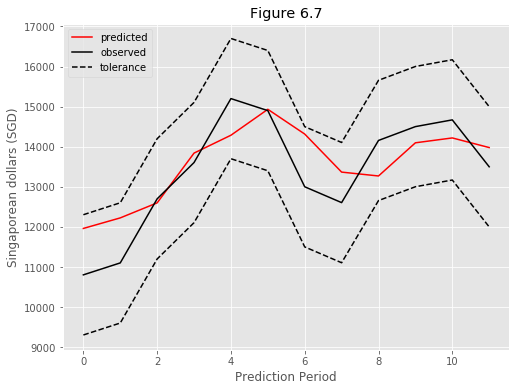

In [13]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

plt.plot(range(len(pred1)), pred1, "-", label="predicted", color="red")
plt.plot(range(len(obs)), obs, "-", label="observed", color="black")

plt.plot(range(len(obs)), obs_min, "--", label="tolerance", color="black")
plt.plot(range(len(obs)), obs_max, "--", color="black")

plt.title("Figure 6.7")
plt.xlabel("Prediction Period")
plt.ylabel("Singaporean dollars (SGD)")
plt.legend()
plt.show()